In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
import mglearn as mg
from sklearn import preprocessing
import random
from sklearn import metrics
from scipy import stats
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import roc_curve, roc_auc_score
from eli5.sklearn import PermutationImportance
import shap
import seaborn as sns
plt.rcParams["font.family"] = "Palatino Linotype"

In [3]:
list999 = []
list88 = []
elselist = []
column_feature = []
accuracy = [] 
count0 = [] 
count1 = []
print_list = []
ct = 0
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)


# 혈액검사 변수
column_name_gb = ['HE_BMI']
column_name_g1 = ['HE_glu','HE_HbA1c'] #당뇨
column_name_g2 = ['HE_chol','HE_TG'] #이상지질혈증
column_name_g3 = ['HE_HBsAg','HE_ast','HE_alt','HE_hcv'] #간기능
column_name_g4 = ['HE_HB','HE_HCT'] #빈혈
column_name_g5 = ['HE_crea','HE_BUN'] #신장기능
column_name_g6 = ['HE_WBC','HE_RBC','HE_Bplt','HE_Uacid'] #일반혈액

column_name_g7 = ['HE_PLS', 'HE_sbp', 'HE_dbp'] #맥박, 혈압 'HE_mPLS', 
column_name_g8 = ['HE_ht', 'HE_wt', 'HE_wc']#, 'HE_nc'] #신장, 체중 허리둘레, 목둘레 등 18년 데이터에 nc 없음
column_name_g9 = ['BE3_72','BE3_73','BE3_74'] # 고강도 신체활동
column_name_g10 = ['BE3_83', 'BE3_84'] # 중강도 신체활동 'BE3_82',
column_name_g11 = ['BE3_93', 'BE3_94']# 장소이동 신체활동 'BE3_92', 
column_name_g12 = ['BE3_77', 'BE3_78'] # 여가 고강도 'BE3_76', 
column_name_g13 = ['BE3_87', 'BE3_88'] # 여가 중강도 'BE3_86', 
column_name_g14 = ['BE8_1', 'BE8_2'] # 앉아서 보내는 시간

# BE3_76 여가 고강도 일수 / 77 시간 / 78 분
# 5860
# 576

# BE3_86 여가 중강도 일수 / 87 시간 / 88 분
# 5860
# 1275

# BE3_82 일 중강도 신체활동 일수 / 83 시간 / 84 분
# 5860
# 463        

# BE3_92 장소이동 신체활동 일수 / 93 시간 94 분
# 5860
# 3145

########
column_name_group = column_name_gb + column_name_g1+ column_name_g2 + column_name_g3 + column_name_g4+ column_name_g5 + column_name_g6 + column_name_g7 + column_name_g10 + column_name_g11 + column_name_g12 + column_name_g13 + column_name_g14


# for ic in range(len(column_name_group)-1):
#     column_feature.append([column_name_group[0], column_name_group[ic+1]])

# cl = len(column_feature)
# print(column_feature)

column_feature = [column_name_group]
print(column_feature)
print(len(column_feature))

[['HE_BMI', 'HE_glu', 'HE_HbA1c', 'HE_chol', 'HE_TG', 'HE_HBsAg', 'HE_ast', 'HE_alt', 'HE_hcv', 'HE_HB', 'HE_HCT', 'HE_crea', 'HE_BUN', 'HE_WBC', 'HE_RBC', 'HE_Bplt', 'HE_Uacid', 'HE_PLS', 'HE_sbp', 'HE_dbp', 'BE3_83', 'BE3_84', 'BE3_93', 'BE3_94', 'BE3_77', 'BE3_78', 'BE3_87', 'BE3_88', 'BE8_1', 'BE8_2']]
1


In [3]:
column_feature = [column_name_group]
for i in range(len(column_name_group)):
    data = pd.read_csv("DATA/hn2016_all.csv",encoding='utf-8',low_memory=False)
    data[column_name_group[i]] = pd.to_numeric(data[column_name_group[i]], errors='coerce').astype(float).round(2)
    data = data.dropna(how = 'any')
    # print(column_name_group[i])
    # print(len(data[column_name_group[i]]))
    
    for i in range(len(column_feature)):    
        for j in range(len(column_feature[i])):
            ### 8,9제거
            if column_feature[i][j] in list999:
                data.drop(data[(data[column_feature[i][j]] == 888) | (data[column_feature[i][j]] == 999)].index, inplace = True)
            elif column_feature[i][j] in list88:
                data.drop(data[(data[column_feature[i][j]] == 88) | (data[column_feature[i][j]] == 99)].index, inplace = True)
            else:
                data.drop(data[(data[column_feature[i][j]] == 8) | (data[column_feature[i][j]] == 9)].index, inplace = True)
        
        # print(len(data[column_name_group[i]]))

# 전처리 후 데이터 갯수를 확인하는 부분 지우지 말것.

FixedFormatter should only be used together with FixedLocator
FixedFormatter should only be used together with FixedLocator


1


FixedFormatter should only be used together with FixedLocator


2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


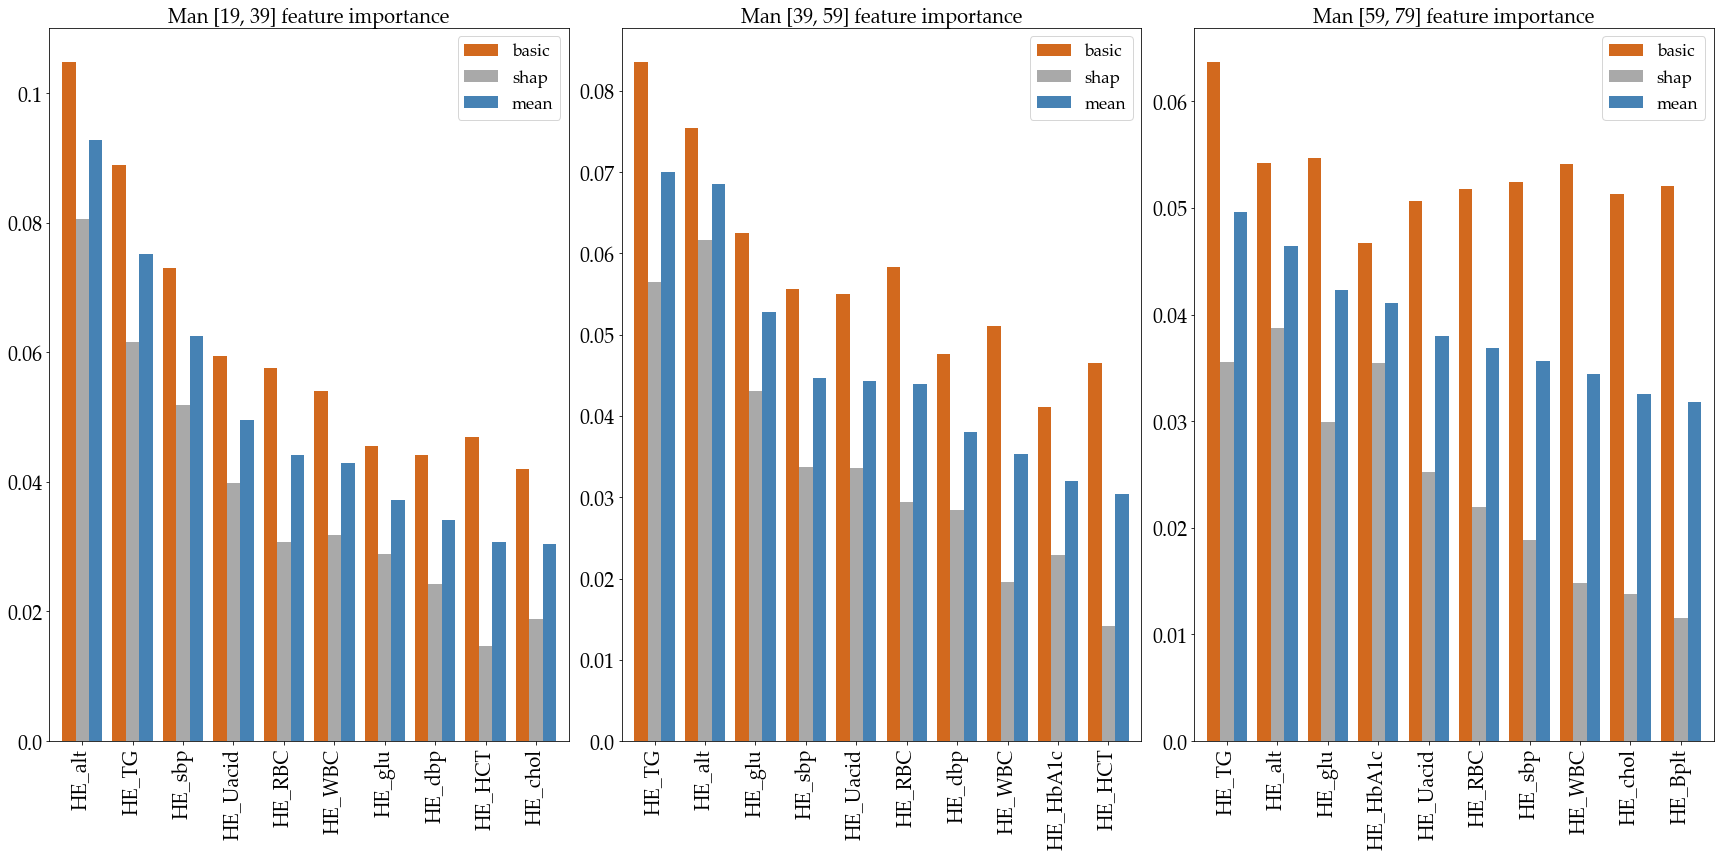

In [4]:
sup = "_Binary_OVERSAMPLING_No_gender_194979"
PATH = "RFC_Feature_Selection"
import os
os.makedirs(PATH,exist_ok=True)

fig, ax = plt.subplots(1,3, figsize=(24,12))

BMI_grade = []
iter = 0
iteration_test = []
ii = 0
for ii in [1]:#,2]: # sex
    data10 = pd.read_csv("DATA/hn2016_all.csv",encoding='utf-8', low_memory=False)
    data11 = pd.read_csv("DATA/hn2017_all.csv",encoding='utf-8', low_memory=False)
    data12 = pd.read_csv("DATA/hn2018_all.csv",encoding='utf-8', low_memory=False)
    data13 = pd.read_csv("DATA/hn2019_all.csv",encoding='utf-8', low_memory=False)
    
    gender10 = data10['sex']
    gender11 = data11['sex']
    gender12 = data12['sex']
    gender13 = data13['sex']
    
    age_list = [[19, 39], [39, 59], [59, 79]]
    # age_list = [[19, 49], [49, 79]]
    for age in range(len(age_list)): 
        
        data10_copy = data10[(data10['age']>=age_list[age][0]) & (data10['age']<age_list[age][1])].copy()
        data11_copy = data11[(data11['age']>=age_list[age][0]) & (data11['age']<age_list[age][1])].copy()
        data12_copy = data12[(data12['age']>=age_list[age][0]) & (data12['age']<age_list[age][1])].copy()
        data13_copy = data13[(data13['age']>=age_list[age][0]) & (data13['age']<age_list[age][1])].copy()
        
        # sex = [ii]
        # data10_copy = data10_copy.loc[gender10.isin(sex)]
        # data11_copy = data11_copy.loc[gender11.isin(sex)]
        # data12_copy = data12_copy.loc[gender12.isin(sex)]
        # data13_copy = data13_copy.loc[gender13.isin(sex)]
        
        data_select10 = data10_copy[column_name_group].copy()
        data_select11 = data11_copy[column_name_group].copy()
        data_select12 = data12_copy[column_name_group].copy()
        data_select13 = data13_copy[column_name_group].copy()
        
        # print(age_list[age])
        for i in range(len(column_feature)):
            BMI_grade.append([])
            ## 숫자로 바꿔주는 코드임.
            for j in range(len(column_feature[i])):
                data_select10[column_feature[i][j]] = pd.to_numeric(data_select10[column_feature[i][j]], errors='coerce').astype(float).round(2)
                data_select11[column_feature[i][j]] = pd.to_numeric(data_select11[column_feature[i][j]], errors='coerce').astype(float).round(2)
                data_select12[column_feature[i][j]] = pd.to_numeric(data_select12[column_feature[i][j]], errors='coerce').astype(float).round(2)
                data_select13[column_feature[i][j]] = pd.to_numeric(data_select13[column_feature[i][j]], errors='coerce').astype(float).round(2)
            
            
            df10 = data_select10[column_feature[i]]
            df11 = data_select11[column_feature[i]]
            df12 = data_select12[column_feature[i]]
            df13 = data_select13[column_feature[i]]
            
            df = pd.concat([df10, df11, df12, df13], ignore_index=True) # 18년 19년 자료 합쳐주는 부분.
            # print(len(df))
            df = df.dropna(how = 'any')
            df = df.sort_values(by = 'HE_BMI')
            # print(len(df))
            for j in range(len(column_feature[i])):
                ### 8,9제거
                if column_feature[i][j] in list999:
                    df.drop(df[(df[column_feature[i][j]] == 888) | (df[column_feature[i][j]] == 999)].index, inplace = True)
                elif column_feature[i][j] in list88:
                    df.drop(df[(df[column_feature[i][j]] == 88) | (df[column_feature[i][j]] == 99)].index, inplace = True)
                else:
                    df.drop(df[(df[column_feature[i][j]] == 8) | (df[column_feature[i][j]] == 9)].index, inplace = True)
            # print(len(df))
            BMI_tmp = df['HE_BMI']
            for k in range(len(df)):
                if BMI_tmp.iloc[k] < 23:
                    BMI_grade[iter].append(0)
                elif 23 <= BMI_tmp.iloc[k] < 25:
                    BMI_grade[iter].append(1)
                elif 25 <= BMI_tmp.iloc[k] <= 30:
                    BMI_grade[iter].append(1)
                elif 30 < BMI_tmp.iloc[k]:
                    BMI_grade[iter].append(1)
            tree_data = df.drop(['HE_BMI'],axis = 1)
            
            
            iteration_test.append([iter,ct])
            if tree_data.empty == False:
                #########################################################
                # data normalizaion
                min_max_scaler = preprocessing.MinMaxScaler()
                x_scaled = min_max_scaler.fit_transform(tree_data)
                tree_data = pd.DataFrame(x_scaled,columns=tree_data.columns)
                tree_data['BMI_grade'] = BMI_grade[iter]
                # print(len(tree_data))

                ########################
                X = tree_data.iloc[:,:-1]
                y = tree_data.iloc[:,-1:]
                y = y.squeeze()
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
                    
                train_ = pd.concat([X_train, y_train], axis=1)
                
                cnt_list = train_['BMI_grade'].squeeze()
                cnt_list = cnt_list.tolist()
                cnt2 = cnt_list.count(2)
                cnt1 = cnt_list.count(1)
                cnt0 = cnt_list.count(0)

                iteration_test[iter].append([cnt0, cnt1, cnt2])
                
                cnt_min = min(cnt0, cnt1, cnt2)
                cnt_max = max(cnt0, cnt1, cnt2)
                
                if cnt_min * cnt_max != 0:
                    if cnt_min/cnt_max > 1.2:
                        cnt_select = cnt_max-cnt_min # 얼마나 차이가 나는지
                        # print(cnt_select)
                        loc_012 = np.where(cnt_max == np.where([cnt0, cnt1, cnt2]))
                        local = train_.loc[(train_['BMI_grade']==loc_012)] #0인 갯수가 부족하니까 그것들을 추출
                        idx = local.index.values # 추출한 것의 index
                        select_list = [random.choice(idx) for i in range(cnt_select)] #랜덤으로 추출된 idx들 모음
                        tree_data_2 = train_.loc[select_list]
                        # print(' 0만 추출된 data')
                        # print(train_.loc[select_list])
                        # print(train_.iloc[select_list])
                    
                        
                        tree_data = pd.concat([train_,tree_data_2], ignore_index=True)
                        # print(tree_data)
                        
                        X_train = tree_data.iloc[:,:-1]
                        y_train = tree_data.iloc[:,-1:]
                        
                    cnt_list = y_train['BMI_grade'].squeeze()
                    cnt_list = cnt_list.tolist()
                    cnt2 = cnt_list.count(2)
                    cnt1 = cnt_list.count(1)
                    cnt0 = cnt_list.count(0)
                    print(cnt0)
                    print(cnt1)
                    print(cnt2)
                    
                    train_data_size = len(y_train)
                    test_data_size = len(y_test)
                    ##########################################################
                    
                    
                clf = ensemble.RandomForestClassifier(random_state=0)
                clf.fit(X_train,y_train)
                
                #### Calculate Feature Importance 
                feats = X.columns.tolist()
                # print(feats)
                # print(X_train[feats])
                # perm = PermutationImportance(clf, random_state=0).fit(X_test, y_test) #여기엔 test를 fit 해야함
                explainer = shap.TreeExplainer(clf)
                shap_values = explainer.shap_values(X_train[feats])
                
                shap_feat_imp = pd.Series(np.abs(shap_values[0]).mean(axis=0), index=feats).sort_values(ascending=False)
                # perm_feat_imp = pd.Series(perm.feature_importances_, index=feats).sort_values(ascending=False)
                basic_feat_imp = pd.Series(clf.feature_importances_, index=feats).sort_values(ascending=False)

                # feat_imp_archive = pd.DataFrame(index=feats, columns=['basic', 'perm', 'shap', 'mean'])
                feat_imp_archive = pd.DataFrame(index=feats, columns=['basic', 'shap', 'mean'])

                feat_imp_archive['basic'] = basic_feat_imp#.rank(ascending=False)
                # feat_imp_archive['perm'] = perm_feat_imp#.rank(ascending=False)
                feat_imp_archive['shap'] = shap_feat_imp#.rank(ascending=False)
                # feat_imp_archive['mean'] = feat_imp_archive[['basic', 'perm', 'shap']].mean(axis=1)
                feat_imp_archive['mean'] = feat_imp_archive[['basic', 'shap']].mean(axis=1)
                feat_imp_archive = feat_imp_archive.sort_values(by='mean',ascending=False)
                
                
                feat_imp_archive2 = feat_imp_archive.iloc[0:10].copy()
                # # feat_imp_archive.drop(['gender', 'age'], axis =1)
                # feat_imp_archive2.plot(ax = ax[ii-1,age], kind='bar', width=0.8, color = ['chocolate','darkgray','steelblue'])
                # gt = ['Man', 'Women']
                # ax[ii-1,age].set_title(gt[ii-1] + ' ' + str(age_list[age]) + ' feature importance', fontsize=20)
                # ax[ii-1,age].set_xticklabels(feat_imp_archive2.index,fontsize=20)
                # yticks_ = ax[ii-1,age].get_yticks()
                # ax[ii-1,age].set_yticklabels(yticks_,fontsize=20)
                # ax[ii-1,age].legend(fontsize=17)
                
                
                feat_imp_archive2.plot(ax = ax[age], kind='bar', width=0.8, color = ['chocolate','darkgray','steelblue'])
                gt = ['Man', 'Women']
                ax[age].set_title(gt[ii-1] + ' ' + str(age_list[age]) + ' feature importance', fontsize=20)
                ax[age].set_xticklabels(feat_imp_archive2.index,fontsize=20)
                yticks_ = ax[age].get_yticks()
                ax[age].set_yticklabels(yticks_,fontsize=20)
                ax[age].legend(fontsize=17)
                                    
                # fig = plt.gcf()
                # fig = feat_imp_archive2.get_figure()
                # plt.savefig(str(ii) + ' ' + str(age_list[age]) + ' output.png')
                # plt.close()
                ## 그림 먼저 그리고 DataFrame에 gender랑 age 추가. 그림이 겹쳐서 다른 데이터 프레임으로 저장함.
                
                feat_imp_archive = feat_imp_archive.copy()
                feat_imp_archive['gender'] = ii
                feat_imp_archive['age'] = str(age_list[age])
                
                if ct != 0:
                    print(ct)
                    feat_imp_archive= pd.concat([dataframe_tmp, feat_imp_archive], join='inner') # 18년 19년 자료 합쳐주는 부분.
                    # print(feat_imp_archive)
                    
                dataframe_tmp = feat_imp_archive.copy()
                #feat_imp_archive.to_csv(str(ii) + ' ' + str(age_list[age]) + ' RFC_feature_selection.csv')#, index=False)

                
                
                    
                ct += 1
                
            elif cnt1 * cnt0 == 0:
                print('확인해야함!!')
                print(column_feature[i])
                
            
        iter += 1
            
fig.tight_layout()
fig.savefig(PATH +'/RFC_feature_selection' +  sup + '.png')
fig.savefig(PATH +'/RFC_feature_selection' + sup + '.eps', format='eps')
feat_imp_archive = feat_imp_archive[['gender', 'age', 'basic', 'shap', 'mean']]
feat_imp_archive.to_csv(PATH + '/RFC_feature_selection' + sup + '.csv')#, index=False)

Multi Label Classification

1414
534
926


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
FixedFormatter should only be used together with FixedLocator


3
             basic      shap      mean  gender       age
HE_alt    0.104823  0.080635  0.092729       1  [19, 39]
HE_TG     0.088827  0.061610  0.075218       1  [19, 39]
HE_sbp    0.073056  0.051890  0.062473       1  [19, 39]
HE_Uacid  0.059344  0.039847  0.049595       1  [19, 39]
HE_RBC    0.057517  0.030692  0.044105       1  [19, 39]
...            ...       ...       ...     ...       ...
BE3_93    0.010426  0.002478  0.006452       1  [19, 39]
BE3_77    0.006868  0.002294  0.004581       1  [19, 39]
BE3_83    0.005892  0.002052  0.003972       1  [19, 39]
BE3_84    0.005283  0.001695  0.003489       1  [19, 39]
BE8_2     0.003426  0.000769  0.002097       1  [19, 39]

[116 rows x 5 columns]
1810
1107
1691


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
FixedFormatter should only be used together with FixedLocator


4
             basic      shap      mean  gender       age
HE_alt    0.104823  0.080635  0.092729       1  [19, 39]
HE_TG     0.088827  0.061610  0.075218       1  [19, 39]
HE_sbp    0.073056  0.051890  0.062473       1  [19, 39]
HE_Uacid  0.059344  0.039847  0.049595       1  [19, 39]
HE_RBC    0.057517  0.030692  0.044105       1  [19, 39]
...            ...       ...       ...     ...       ...
BE3_78    0.007103  0.001936  0.004519       1  [39, 59]
BE3_77    0.006539  0.002013  0.004276       1  [39, 59]
BE3_83    0.005350  0.001239  0.003295       1  [39, 59]
BE3_84    0.005032  0.001098  0.003065       1  [39, 59]
BE8_2     0.004749  0.001351  0.003050       1  [39, 59]

[145 rows x 5 columns]
1344
1056
1543


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
FixedFormatter should only be used together with FixedLocator


5
             basic      shap      mean  gender       age
HE_alt    0.104823  0.080635  0.092729       1  [19, 39]
HE_TG     0.088827  0.061610  0.075218       1  [19, 39]
HE_sbp    0.073056  0.051890  0.062473       1  [19, 39]
HE_Uacid  0.059344  0.039847  0.049595       1  [19, 39]
HE_RBC    0.057517  0.030692  0.044105       1  [19, 39]
...            ...       ...       ...     ...       ...
BE8_2     0.006056  0.001298  0.003677       1  [59, 79]
BE3_84    0.003842  0.000957  0.002400       1  [59, 79]
BE3_78    0.003556  0.000915  0.002235       1  [59, 79]
BE3_83    0.003460  0.000719  0.002089       1  [59, 79]
BE3_77    0.003240  0.000520  0.001880       1  [59, 79]

[174 rows x 5 columns]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


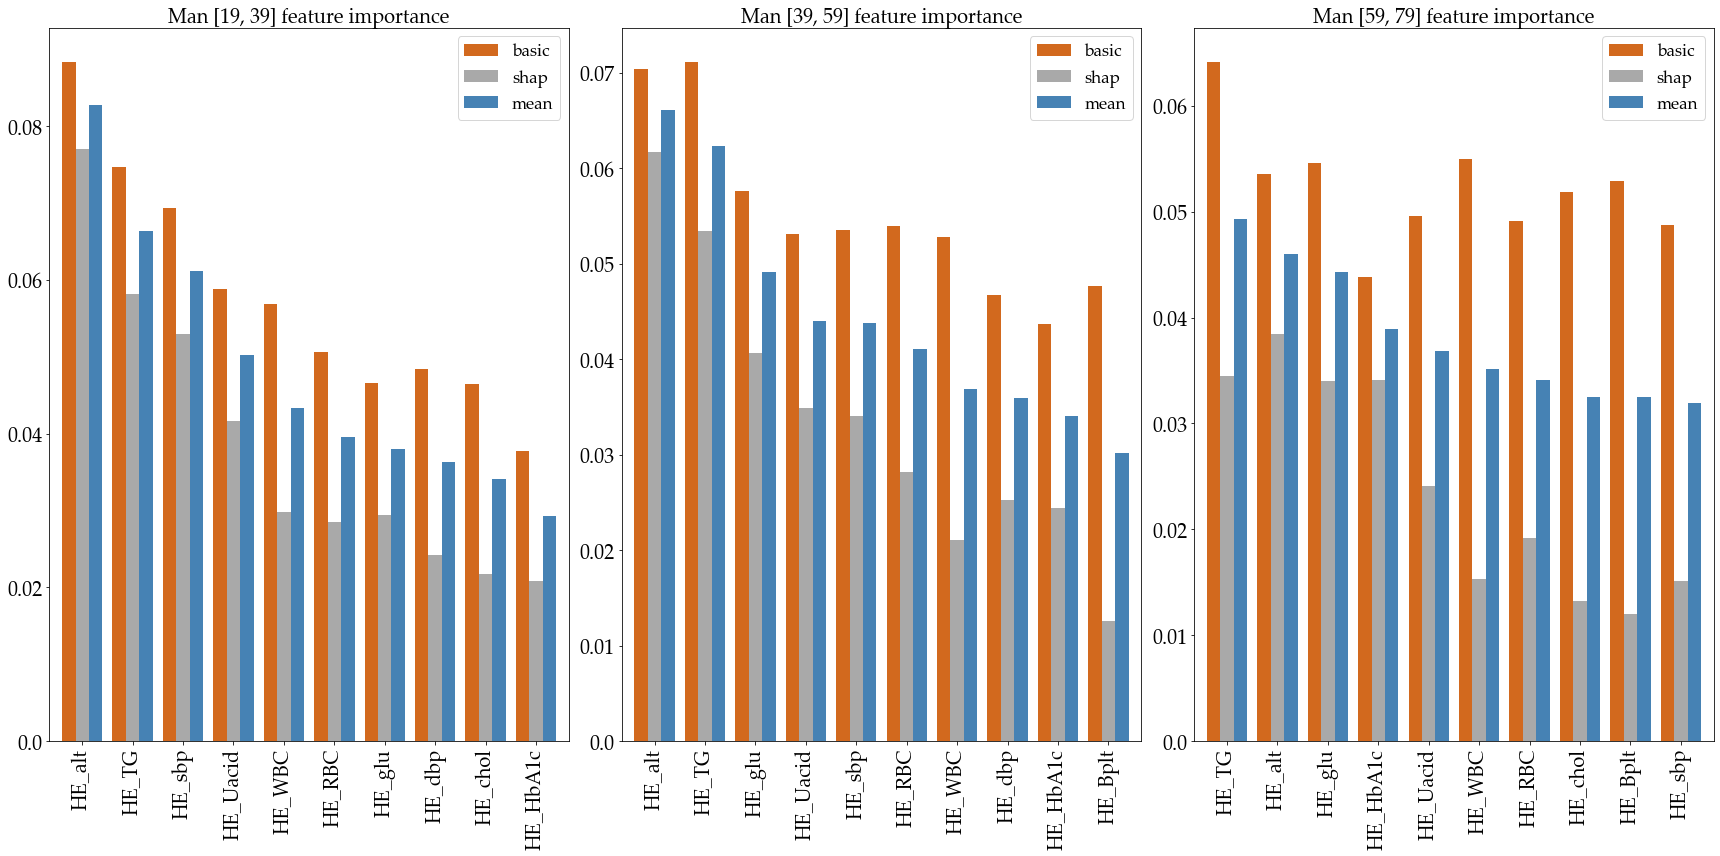

In [5]:
sup = "_Multiclass_OVERSAMPLING_No_gender_194979"
PATH = "RFC_Feature_Selection"
import os
os.makedirs(PATH,exist_ok=True)

fig, ax = plt.subplots(1,3, figsize=(24,12))

BMI_grade = []
iter = 0
iteration_test = []
ii = 0
for ii in [1]:#,2]: # sex
    data10 = pd.read_csv("DATA/hn2016_all.csv",encoding='utf-8', low_memory=False)
    data11 = pd.read_csv("DATA/hn2017_all.csv",encoding='utf-8', low_memory=False)
    data12 = pd.read_csv("DATA/hn2018_all.csv",encoding='utf-8', low_memory=False)
    data13 = pd.read_csv("DATA/hn2019_all.csv",encoding='utf-8', low_memory=False)
    
    gender10 = data10['sex']
    gender11 = data11['sex']
    gender12 = data12['sex']
    gender13 = data13['sex']
    
    age_list = [[19, 39], [39, 59], [59, 79]]
    # age_list = [[19, 49], [49, 79]]
    for age in range(len(age_list)): 
        
        data10_copy = data10[(data10['age']>=age_list[age][0]) & (data10['age']<age_list[age][1])].copy()
        data11_copy = data11[(data11['age']>=age_list[age][0]) & (data11['age']<age_list[age][1])].copy()
        data12_copy = data12[(data12['age']>=age_list[age][0]) & (data12['age']<age_list[age][1])].copy()
        data13_copy = data13[(data13['age']>=age_list[age][0]) & (data13['age']<age_list[age][1])].copy()
        
        # sex = [ii]
        # data10_copy = data10_copy.loc[gender10.isin(sex)]
        # data11_copy = data11_copy.loc[gender11.isin(sex)]
        # data12_copy = data12_copy.loc[gender12.isin(sex)]
        # data13_copy = data13_copy.loc[gender13.isin(sex)]
        
        data_select10 = data10_copy[column_name_group].copy()
        data_select11 = data11_copy[column_name_group].copy()
        data_select12 = data12_copy[column_name_group].copy()
        data_select13 = data13_copy[column_name_group].copy()
        
        # print(age_list[age])
        for i in range(len(column_feature)):
            BMI_grade.append([])
            ## 숫자로 바꿔주는 코드임.
            for j in range(len(column_feature[i])):
                data_select10[column_feature[i][j]] = pd.to_numeric(data_select10[column_feature[i][j]], errors='coerce').astype(float).round(2)
                data_select11[column_feature[i][j]] = pd.to_numeric(data_select11[column_feature[i][j]], errors='coerce').astype(float).round(2)
                data_select12[column_feature[i][j]] = pd.to_numeric(data_select12[column_feature[i][j]], errors='coerce').astype(float).round(2)
                data_select13[column_feature[i][j]] = pd.to_numeric(data_select13[column_feature[i][j]], errors='coerce').astype(float).round(2)
            

            df10 = data_select10[column_feature[i]]
            df11 = data_select11[column_feature[i]]
            df12 = data_select12[column_feature[i]]
            df13 = data_select13[column_feature[i]]
            
            df = pd.concat([df10, df11, df12, df13], ignore_index=True) # 18년 19년 자료 합쳐주는 부분.
            # print(len(df))
            df = df.dropna(how = 'any')
            df = df.sort_values(by = 'HE_BMI')
            # print(len(df))
            for j in range(len(column_feature[i])):
                ### 8,9제거
                if column_feature[i][j] in list999:
                    df.drop(df[(df[column_feature[i][j]] == 888) | (df[column_feature[i][j]] == 999)].index, inplace = True)
                elif column_feature[i][j] in list88:
                    df.drop(df[(df[column_feature[i][j]] == 88) | (df[column_feature[i][j]] == 99)].index, inplace = True)
                else:
                    df.drop(df[(df[column_feature[i][j]] == 8) | (df[column_feature[i][j]] == 9)].index, inplace = True)
            # print(len(df))
            BMI_tmp = df['HE_BMI']
            for k in range(len(df)):
                if BMI_tmp.iloc[k] < 23:
                    BMI_grade[iter].append(0)
                elif 23 <= BMI_tmp.iloc[k] < 25:
                    BMI_grade[iter].append(1)
                elif 25 <= BMI_tmp.iloc[k]:
                    BMI_grade[iter].append(2)
            tree_data = df.drop(['HE_BMI'],axis = 1)
            
            
            iteration_test.append([iter,ct])
            if tree_data.empty == False:
                #########################################################
                # data normalizaion
                min_max_scaler = preprocessing.MinMaxScaler()
                x_scaled = min_max_scaler.fit_transform(tree_data)
                tree_data = pd.DataFrame(x_scaled,columns=tree_data.columns)
                tree_data['BMI_grade'] = BMI_grade[iter]
                
                X = tree_data.iloc[:,:-1]
                y = tree_data.iloc[:,-1:]
                # y = y.squeeze()
                X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

                train_ = pd.concat([X_train, y_train], axis=1)
                # print(train_)
                
                cnt_list = train_['BMI_grade'].squeeze()
                cnt_list = cnt_list.tolist()
                cnt2 = cnt_list.count(2)
                cnt1 = cnt_list.count(1)
                cnt0 = cnt_list.count(0)
                # print(cnt0)
                # print(cnt1)
                # print(cnt2)
                # tree_data_1 = y_train.copy()
                # print(tree_data_1)

                iteration_test[iter].append([cnt0, cnt1, cnt2])
                
                cnt_min = min(cnt0, cnt1, cnt2)
                cnt_max = max(cnt0, cnt1, cnt2)
                
                if cnt_min * cnt_max != 0:
                    if cnt_min/cnt_max > 1.2:
                        cnt_select = cnt_max-cnt_min # 얼마나 차이가 나는지
                        # print(cnt_select)
                        loc_012 = np.where(cnt_max == np.where([cnt0, cnt1, cnt2]))
                        local = train_.loc[(train_['BMI_grade']==loc_012)] #0인 갯수가 부족하니까 그것들을 추출
                        idx = local.index.values # 추출한 것의 index
                        select_list = [random.choice(idx) for i in range(cnt_select)] #랜덤으로 추출된 idx들 모음
                        tree_data_2 = train_.loc[select_list]
                        # print(' 0만 추출된 data')
                        # print(train_.loc[select_list])
                        # print(train_.iloc[select_list])
                    
                        
                        tree_data = pd.concat([train_,tree_data_2], ignore_index=True)
                        # print(tree_data)
                        
                        X_train = tree_data.iloc[:,:-1]
                        y_train = tree_data.iloc[:,-1:]
                        
                    cnt_list = y_train['BMI_grade'].squeeze()
                    cnt_list = cnt_list.tolist()
                    cnt2 = cnt_list.count(2)
                    cnt1 = cnt_list.count(1)
                    cnt0 = cnt_list.count(0)
                    print(cnt0)
                    print(cnt1)
                    print(cnt2)
                    
                    train_data_size = len(y_train)
                    test_data_size = len(y_test)
                    
                    ##########################################################
                    
                    
                clf = ensemble.RandomForestClassifier(random_state=0)
                clf.fit(X_train,y_train)
                
                #### Calculate Feature Importance 
                feats = X.columns.tolist()
                # print(feats)
                # print(X_train[feats])
                # perm = PermutationImportance(clf, random_state=0).fit(X_test, y_test) #여기엔 test를 fit 해야함
                explainer = shap.TreeExplainer(clf)
                shap_values = explainer.shap_values(X_train[feats])
                
                shap_feat_imp = pd.Series(np.abs(shap_values[0]).mean(axis=0), index=feats).sort_values(ascending=False)
                # perm_feat_imp = pd.Series(perm.feature_importances_, index=feats).sort_values(ascending=False)
                basic_feat_imp = pd.Series(clf.feature_importances_, index=feats).sort_values(ascending=False)

                # feat_imp_archive = pd.DataFrame(index=feats, columns=['basic', 'perm', 'shap', 'mean'])
                feat_imp_archive = pd.DataFrame(index=feats, columns=['basic', 'shap', 'mean'])

                feat_imp_archive['basic'] = basic_feat_imp#.rank(ascending=False)
                # feat_imp_archive['perm'] = perm_feat_imp#.rank(ascending=False)
                feat_imp_archive['shap'] = shap_feat_imp#.rank(ascending=False)
                # feat_imp_archive['mean'] = feat_imp_archive[['basic', 'perm', 'shap']].mean(axis=1)
                feat_imp_archive['mean'] = feat_imp_archive[['basic', 'shap']].mean(axis=1)
                feat_imp_archive = feat_imp_archive.sort_values(by='mean',ascending=False)
                
                
                feat_imp_archive2 = feat_imp_archive.iloc[0:10].copy()
                # feat_imp_archive2.plot(ax = ax[ii-1,age], kind='bar', width=0.8, color = ['chocolate','darkgray','steelblue'])
                # gt = ['Man', 'Women']
                # ax[ii-1,age].set_title(gt[ii-1] + ' ' + str(age_list[age]) + ' feature importance', fontsize=20)
                # ax[ii-1,age].set_xticklabels(feat_imp_archive2.index,fontsize=20)
                # yticks_ = ax[ii-1,age].get_yticks()
                # ax[ii-1,age].set_yticklabels(yticks_,fontsize=20)
                # ax[ii-1,age].legend(fontsize=17, loc='upper right')
                
                
                feat_imp_archive2.plot(ax = ax[age], kind='bar', width=0.8, color = ['chocolate','darkgray','steelblue'])
                gt = ['Man', 'Women']
                ax[age].set_title(gt[ii-1] + ' ' + str(age_list[age]) + ' feature importance', fontsize=20)
                ax[age].set_xticklabels(feat_imp_archive2.index,fontsize=20)
                yticks_ = ax[age].get_yticks()
                ax[age].set_yticklabels(yticks_,fontsize=20)
                ax[age].legend(fontsize=17)
                # fig = plt.gcf()
                # fig = feat_imp_archive2.get_figure()
                # plt.savefig(str(ii) + ' ' + str(age_list[age]) + ' output.png')
                # plt.close()
                ## 그림 먼저 그리고 DataFrame에 gender랑 age 추가. 그림이 겹쳐서 다른 데이터 프레임으로 저장함.
                
                feat_imp_archive = feat_imp_archive.copy()
                feat_imp_archive['gender'] = ii
                feat_imp_archive['age'] = str(age_list[age])
                
                if ct != 0:
                    print(ct)
                    feat_imp_archive= pd.concat([dataframe_tmp, feat_imp_archive], join='inner') # 18년 19년 자료 합쳐주는 부분.
                    print(feat_imp_archive)
                    
                dataframe_tmp = feat_imp_archive.copy()
                #feat_imp_archive.to_csv(str(ii) + ' ' + str(age_list[age]) + ' RFC_feature_selection.csv')#, index=False)


                ct += 1
                
            elif cnt_min * cnt_max == 0:
                print('확인해야함!!')
                print(column_feature[i])
            
        iter += 1

fig.tight_layout()
fig.savefig(PATH + '/RFC_feature_selection' + sup + '.png')
fig.savefig(PATH + '/RFC_feature_selection' + sup + '.eps', format='eps')
feat_imp_archive = feat_imp_archive[['gender', 'age', 'basic', 'shap', 'mean']]
feat_imp_archive.to_csv(PATH + '/RFC_feature_selection' + sup + '.csv')#, index=False)

Make Heatmap

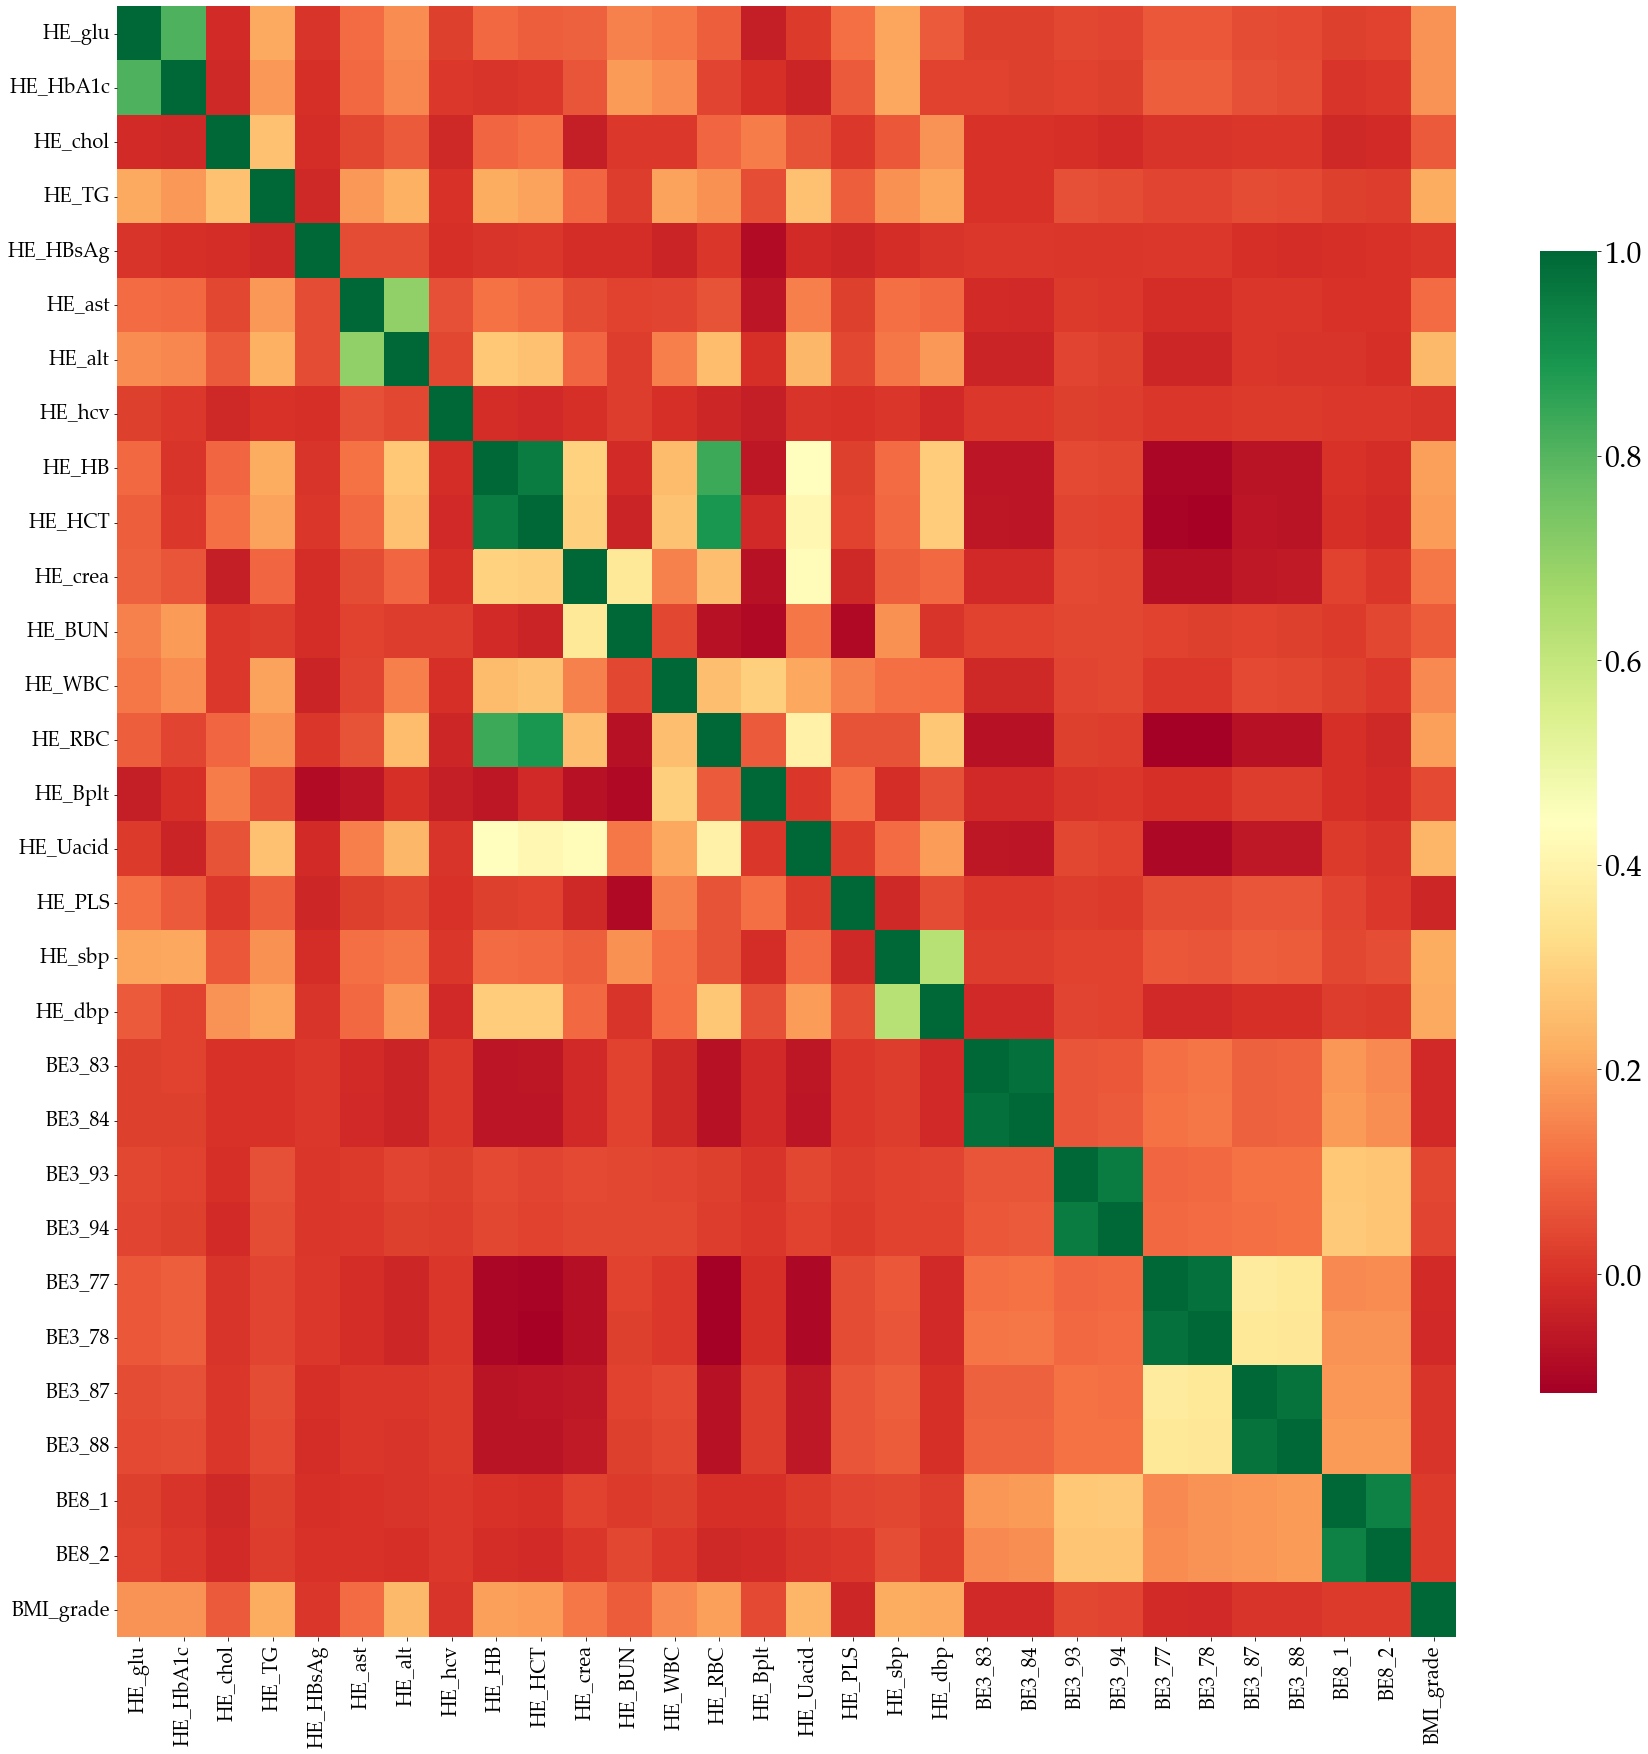

In [12]:
sup = "_Binary"
PATH = "Corr_Heatmap"
import os
os.makedirs(PATH,exist_ok=True)

BMI_grade = []
iter = 0
iteration_test = []

data = pd.read_csv("DATA/hn2016_all.csv",encoding='utf-8', low_memory=False)
data2 = pd.read_csv("DATA/hn2017_all.csv",encoding='utf-8', low_memory=False)
data3 = pd.read_csv("DATA/hn2018_all.csv",encoding='utf-8', low_memory=False)
data4 = pd.read_csv("DATA/hn2019_all.csv",encoding='utf-8', low_memory=False)

# gender = data['sex']
# gender2 = data2['sex']
# gender3 = data3['sex']
# gender4 = data4['sex']

age_list = [[19, 79]]#, [39, 59], [59, 79]]
for age in range(len(age_list)): 
    
    data_copy = data[(data['age']>=age_list[age][0]) & (data['age']<age_list[age][1])].copy()
    data2_copy = data2[(data2['age']>=age_list[age][0]) & (data2['age']<age_list[age][1])].copy()
    data3_copy = data3[(data3['age']>=age_list[age][0]) & (data3['age']<age_list[age][1])].copy()
    data4_copy = data4[(data4['age']>=age_list[age][0]) & (data4['age']<age_list[age][1])].copy()
    
    # sex = [ii]
    # data_copy = data_copy.loc[gender.isin(sex)]
    # data2_copy = data2_copy.loc[gender2.isin(sex)]
    # data3_copy = data3_copy.loc[gender3.isin(sex)]
    # data4_copy = data4_copy.loc[gender4.isin(sex)]
    
    data_select = data_copy[column_name_group].copy()
    data_select2 = data2_copy[column_name_group].copy()
    data_select3 = data3_copy[column_name_group].copy()
    data_select4 = data4_copy[column_name_group].copy()
    # print(age_list[age])
    for i in range(len(column_feature)):
        BMI_grade.append([])
        ## 숫자로 바꿔주는 코드임.
        for j in range(len(column_feature[i])):
            data_select[column_feature[i][j]] = pd.to_numeric(data_select[column_feature[i][j]], errors='coerce').astype(float).round(2)
            data_select2[column_feature[i][j]] = pd.to_numeric(data_select2[column_feature[i][j]], errors='coerce').astype(float).round(2)
            data_select3[column_feature[i][j]] = pd.to_numeric(data_select3[column_feature[i][j]], errors='coerce').astype(float).round(2)
            data_select4[column_feature[i][j]] = pd.to_numeric(data_select4[column_feature[i][j]], errors='coerce').astype(float).round(2)            #print(len(df)) #16000개
        

        df1 = data_select[column_feature[i]]
        df2 = data_select2[column_feature[i]]
        df3 = data_select3[column_feature[i]]
        df4 = data_select4[column_feature[i]]
        
        df = pd.concat([df1, df2, df3, df4], ignore_index=True) # 18년 19년 자료 합쳐주는 부분.
        df = df.dropna(how = 'any')
        df = df.sort_values(by = 'HE_BMI')
        # print(df)
        for j in range(len(column_feature[i])):
            ### 8,9제거
            if column_feature[i][j] in list999:
                df.drop(df[(df[column_feature[i][j]] == 888) | (df[column_feature[i][j]] == 999)].index, inplace = True)
            elif column_feature[i][j] in list88:
                df.drop(df[(df[column_feature[i][j]] == 88) | (df[column_feature[i][j]] == 99)].index, inplace = True)
            else:
                df.drop(df[(df[column_feature[i][j]] == 8) | (df[column_feature[i][j]] == 9)].index, inplace = True)

        BMI_tmp = df['HE_BMI']
        for k in range(len(df)): #여기서 문제가 생기는구나. 어떡할까
            # print(i+cl*(ii-1)+len(age_list)*(age))
            if BMI_tmp.iloc[k] < 23:
                BMI_grade[iter].append(0)
            elif 23 <= BMI_tmp.iloc[k]:
                BMI_grade[iter].append(1)
        tree_data = df.drop(['HE_BMI'],axis = 1)
        
        
        iteration_test.append([iter,ct])
        if tree_data.empty == False:
            #########################################################
            # data normalizaion
            min_max_scaler = preprocessing.MinMaxScaler()
            x_scaled = min_max_scaler.fit_transform(tree_data)
            tree_data = pd.DataFrame(x_scaled,columns=tree_data.columns)
            tree_data['BMI_grade'] = BMI_grade[iter]

            cnt_list = tree_data['BMI_grade'].tolist()
            cnt1 = cnt_list.count(1)
            cnt0 = cnt_list.count(0)
            tree_data_1 = tree_data.copy()

            iteration_test[iter].append([cnt0, cnt1])
            
            if cnt1 * cnt0 != 0:
                if cnt1/cnt0 > 1.2:
                    cnt_select = cnt1-cnt0 # 얼마나 차이가 나는지
                    local = tree_data_1.loc[(tree_data['BMI_grade']==0)] #0인 갯수가 부족하니까 그것들을 추출
                    idx = local.index.values # 추출한 것의 index
                    select_list = [random.choice(idx) for i in range(cnt_select)] #랜덤으로 추출된 idx들 모음
                    tree_data_2 = tree_data_1.iloc[select_list]
                    tree_data = pd.concat([tree_data_1,tree_data_2], ignore_index=True)

                elif cnt0/cnt1 > 1.2:
                    cnt_select = cnt0-cnt1
                    local = tree_data_1.loc[(tree_data['BMI_grade']==1)]
                    idx = local.index.values
                    select_list = [random.choice(idx) for i in range(cnt_select)]
                    tree_data_2 = tree_data_1.iloc[select_list]
                    tree_data = pd.concat([tree_data_1,tree_data_2], ignore_index=True)

                #######################
                cnt_list = tree_data['BMI_grade'].tolist()
                cnt1 = cnt_list.count(1)
                cnt0 = cnt_list.count(0)
                ########################
                X = tree_data.iloc[:,:-1]
                y = tree_data.iloc[:,-1:]
                
                corrmat = tree_data.corr()
                top_corr_features = corrmat.index
                plt.figure(figsize=(30,30))
                plt.rcParams["font.family"] = "Palatino Linotype"
                g=sns.heatmap(tree_data[top_corr_features].corr(),cmap="RdYlGn",cbar_kws={"shrink": .70}) #annot=True,
                
                cbar = g.collections[0].colorbar
                cbar.ax.tick_params(labelsize=30)
                for tick_ in cbar.ax.get_yticklabels():
                    tick_.set_fontsize(30)
                plt.yticks(fontsize=20, rotation=0)
                plt.xticks(fontsize=20, rotation=90)
                plt.savefig(PATH + '/Figure_3_Heatmap_1.eps', format='eps')
                plt.savefig(PATH + '/Figure_3_Heatmap_1.png')
                
                
            elif cnt1 * cnt0 == 0:
                print('확인해야함!!')
                print(column_feature[i])
            
        iter += 1

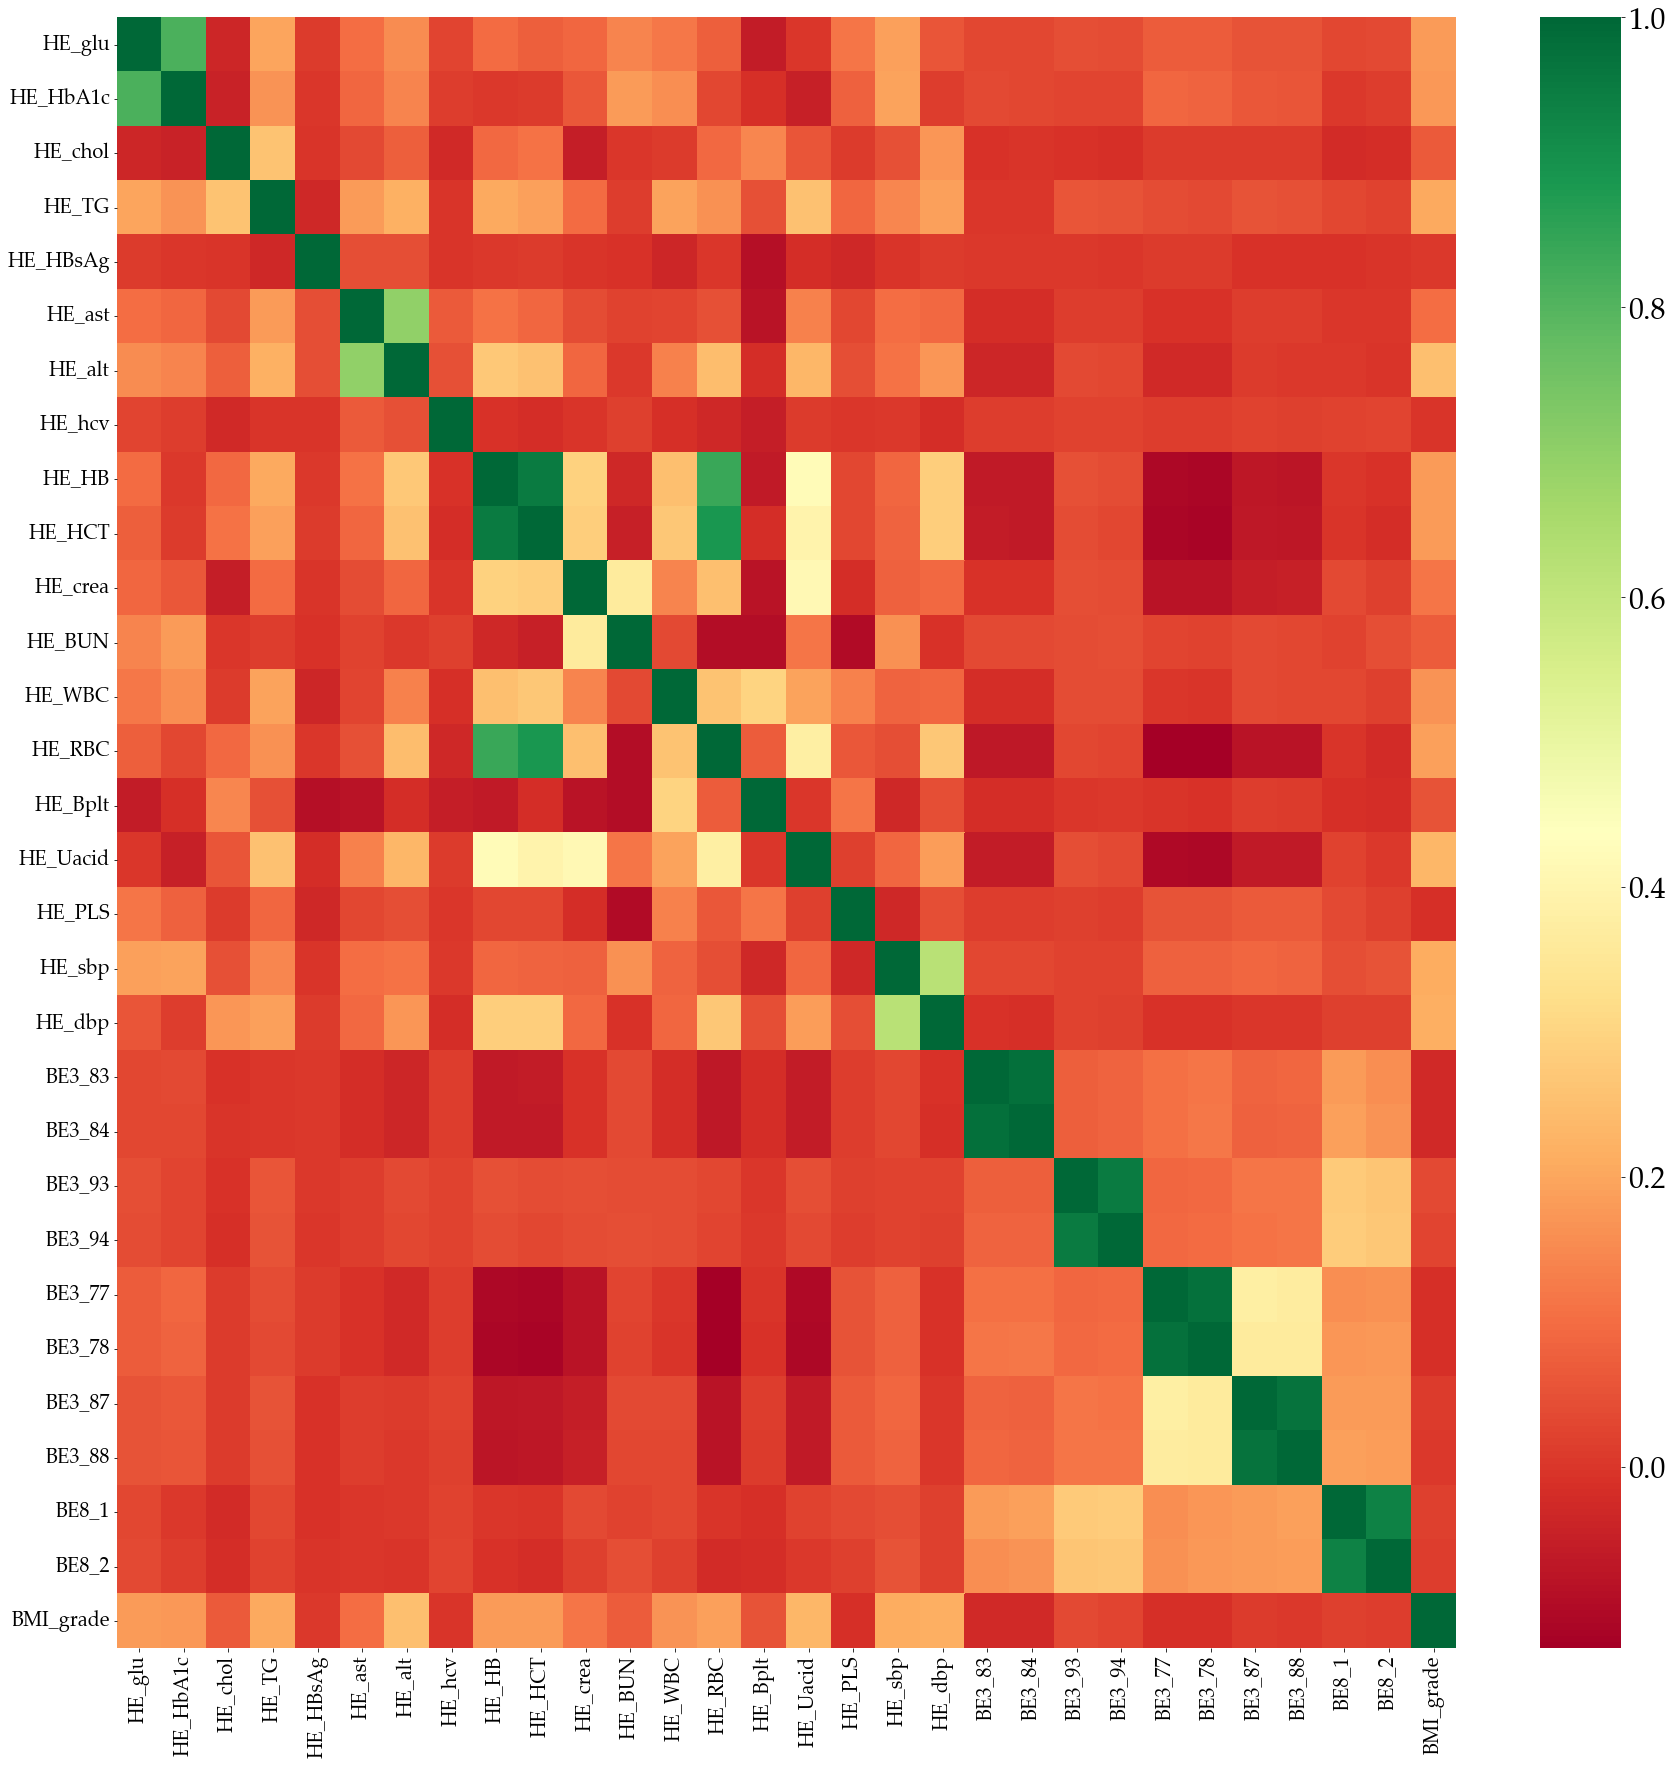

In [98]:
sup = "_Multiclass"
PATH = "Corr_Heatmap"
import os
os.makedirs(PATH,exist_ok=True)

BMI_grade = []
iter = 0
iteration_test = []

data = pd.read_csv("DATA/hn2016_all.csv",encoding='utf-8', low_memory=False)
data2 = pd.read_csv("DATA/hn2017_all.csv",encoding='utf-8', low_memory=False)
data3 = pd.read_csv("DATA/hn2018_all.csv",encoding='utf-8', low_memory=False)
data4 = pd.read_csv("DATA/hn2019_all.csv",encoding='utf-8', low_memory=False)

# gender = data['sex']
# gender2 = data2['sex']
# gender3 = data3['sex']
# gender4 = data4['sex']

age_list = [[19, 79]]#, [39, 59], [59, 79]]
for age in range(len(age_list)): 
    
    data_copy = data[(data['age']>=age_list[age][0]) & (data['age']<age_list[age][1])].copy()
    data2_copy = data2[(data2['age']>=age_list[age][0]) & (data2['age']<age_list[age][1])].copy()
    data3_copy = data3[(data3['age']>=age_list[age][0]) & (data3['age']<age_list[age][1])].copy()
    data4_copy = data4[(data4['age']>=age_list[age][0]) & (data4['age']<age_list[age][1])].copy()
    
    # sex = [ii]
    # data_copy = data_copy.loc[gender.isin(sex)]
    # data2_copy = data2_copy.loc[gender2.isin(sex)]
    # data3_copy = data3_copy.loc[gender3.isin(sex)]
    # data4_copy = data4_copy.loc[gender4.isin(sex)]
    
    data_select = data_copy[column_name_group].copy()
    data_select2 = data2_copy[column_name_group].copy()
    data_select3 = data3_copy[column_name_group].copy()
    data_select4 = data4_copy[column_name_group].copy()
    # print(age_list[age])
    for i in range(len(column_feature)):
        BMI_grade.append([])
        ## 숫자로 바꿔주는 코드임.
        for j in range(len(column_feature[i])):
            data_select[column_feature[i][j]] = pd.to_numeric(data_select[column_feature[i][j]], errors='coerce').astype(float).round(2)
            data_select2[column_feature[i][j]] = pd.to_numeric(data_select2[column_feature[i][j]], errors='coerce').astype(float).round(2)
            data_select3[column_feature[i][j]] = pd.to_numeric(data_select3[column_feature[i][j]], errors='coerce').astype(float).round(2)
            data_select4[column_feature[i][j]] = pd.to_numeric(data_select4[column_feature[i][j]], errors='coerce').astype(float).round(2)            #print(len(df)) #16000개
        

        df1 = data_select[column_feature[i]]
        df2 = data_select2[column_feature[i]]
        df3 = data_select3[column_feature[i]]
        df4 = data_select4[column_feature[i]]
        
        df = pd.concat([df1, df2, df3, df4], ignore_index=True) # 18년 19년 자료 합쳐주는 부분.
        df = df.dropna(how = 'any')
        df = df.sort_values(by = 'HE_BMI')
        # print(df)
        for j in range(len(column_feature[i])):
            ### 8,9제거
            if column_feature[i][j] in list999:
                df.drop(df[(df[column_feature[i][j]] == 888) | (df[column_feature[i][j]] == 999)].index, inplace = True)
            elif column_feature[i][j] in list88:
                df.drop(df[(df[column_feature[i][j]] == 88) | (df[column_feature[i][j]] == 99)].index, inplace = True)
            else:
                df.drop(df[(df[column_feature[i][j]] == 8) | (df[column_feature[i][j]] == 9)].index, inplace = True)

        BMI_tmp = df['HE_BMI']
        for k in range(len(df)): #여기서 문제가 생기는구나. 어떡할까
            # print(i+cl*(ii-1)+len(age_list)*(age))
            if BMI_tmp.iloc[k] < 23:
                BMI_grade[iter].append(0)
            elif 23 <= BMI_tmp.iloc[k] < 25:
                BMI_grade[iter].append(1)
            elif 25 <= BMI_tmp.iloc[k]:
                BMI_grade[iter].append(2)
        tree_data = df.drop(['HE_BMI'],axis = 1)
        
        
        iteration_test.append([iter,ct])
        if tree_data.empty == False:
            #########################################################
            # data normalizaion
            min_max_scaler = preprocessing.MinMaxScaler()
            x_scaled = min_max_scaler.fit_transform(tree_data)
            tree_data = pd.DataFrame(x_scaled,columns=tree_data.columns)
            tree_data['BMI_grade'] = BMI_grade[iter]

            cnt_list = tree_data['BMI_grade'].tolist()
            cnt1 = cnt_list.count(1)
            cnt0 = cnt_list.count(0)
            tree_data_1 = tree_data.copy()

            iteration_test[iter].append([cnt0, cnt1])
            
            if cnt1 * cnt0 != 0:
                if cnt1/cnt0 > 1.2:
                    cnt_select = cnt1-cnt0 # 얼마나 차이가 나는지
                    local = tree_data_1.loc[(tree_data['BMI_grade']==0)] #0인 갯수가 부족하니까 그것들을 추출
                    idx = local.index.values # 추출한 것의 index
                    select_list = [random.choice(idx) for i in range(cnt_select)] #랜덤으로 추출된 idx들 모음
                    tree_data_2 = tree_data_1.iloc[select_list]
                    tree_data = pd.concat([tree_data_1,tree_data_2], ignore_index=True)

                elif cnt0/cnt1 > 1.2:
                    cnt_select = cnt0-cnt1
                    local = tree_data_1.loc[(tree_data['BMI_grade']==1)]
                    idx = local.index.values
                    select_list = [random.choice(idx) for i in range(cnt_select)]
                    tree_data_2 = tree_data_1.iloc[select_list]
                    tree_data = pd.concat([tree_data_1,tree_data_2], ignore_index=True)

                #######################
                cnt_list = tree_data['BMI_grade'].tolist()
                cnt1 = cnt_list.count(1)
                cnt0 = cnt_list.count(0)
                ########################
                X = tree_data.iloc[:,:-1]
                y = tree_data.iloc[:,-1:]
                
                corrmat = tree_data.corr()
                top_corr_features = corrmat.index
                plt.figure(figsize=(30,30))
                plt.rcParams["font.family"] = "Palatino Linotype"
                g=sns.heatmap(tree_data[top_corr_features].corr(),cmap="RdYlGn") #annot=True,
                
                cbar = g.collections[0].colorbar
                cbar.ax.tick_params(labelsize=30)
                
                plt.yticks(fontsize=20, rotation=0)
                plt.xticks(fontsize=20, rotation=90)
                plt.savefig(PATH +'/Figure_3_Heatmap_1.eps', format='eps')
                plt.savefig(PATH + '/Figure_3_Heatmap_1.png')
                
                
            elif cnt1 * cnt0 == 0:
                print('확인해야함!!')
                print(column_feature[i])
            
        iter += 1

In [10]:
pl = pd.DataFrame(print_list,
                    columns=['gender',
                             '<= age <',
                            "group", 
                            "list",
                            'Number Of 0',
                            'Number of 1',
                            'TP',
                            'FP',
                            'TN',
                            'FN',
                            'accuracy score',
                            'recall score',
                            'precision score',
                            'f1 score'])

pl.to_csv('RFC_feature_selection.csv', index=False)

In [3]:
Feat = pd.read_csv('RFC_feature_selection.csv')
Feat = Feat.set_index('Unnamed: 0')
Feat = Feat[(Feat['age'] =='[19, 39]') & (Feat['gender'] == 1)]